email : geervanthanra1@gmail.com

<h1>Laporan Proyek Machine Learning - Geervan Thanra</h1>

<h2>Domain Project</h2>

Cancer is a disease that has impacted the medical world of this century like no other. cancer is one of the deadliest diseases known to man, which cure has not been found after several decades, which has taken the lifes of many. The current most popular mean of curing a patient with cancer is with radiation theraphy, which involves blasting radioactive waves into the patient to kill the cancer cells from within. This treatment is more effective the smaller the tumor, which means the earlier the symptons of cancer is identified, the more effective this treatment is for the patient (Lin, 2011). The problem with diagnosing patients with cancer is the time needed to classify if a tumor is present. The current method of identifying and flagging patients with cancer is with <i> Cancer Patient Pathaway </i> (CPP), which functions to shorten the time interval between consultation and treatment in cases of suspected cancer. CPP involves interaction with the patient and interpretting the symptons, but the issue with this system is linking the symptons, especially with vague symptoms, is rather complex (Heltedahl, 2020). 

Accurately diagnosing cancer is only the first step. An equally significant challenge is predicting the survival status of cancer patients, as early diagnosis does not guarantee survival. The survival status classification of cancer patients is critical for determining the appropriate treatment plan and providing accurate prognoses. However, similar to diagnosis, this classification also suffers from variability and complexity, especially when dealing with heterogeneous cancer types and patient responses to treatment.

In this project, machine learning will be used to be used to predict the survival status of cancer patients. Where based on several set parameters, a machine learning model using RandomForest Classifier will be used to identify the survival chances of the patient based on the parameters. The data used for training this model will be taken from Kaggle, where the model will train and predict based on data it has learnt from the dataset.


<h3>References</h3>
Lin R, Tripuraneni P. Radiation therapy in early-stage invasive breast cancer. Indian J Surg Oncol. 2011 Jun;2(2):101-11. doi: 10.1007/s13193-011-0048-8. Epub 2011 May 6. PMID: 22693401; PMCID: PMC3244192.
<br>
<br>
Holtedahl, K. (2020). Challenges in early diagnosis of cancer: the fast track. Scandinavian Journal of Primary Health Care, 38(3), 251–252. https://doi.org/10.1080/02813432.2020.1794415

<h1>Business Understanding</h1>

<h2>Problem Statements</h2>
- Correlating complex parameters in this dataset with the survival status of patients<br>
- Imbalanced dataspread of survival status in the dataset 

<h2>Goals</h2>
- Model that can be used to identify the survival status of patients with precision and accuract <br>

<h2>Solution Statements</h2>
- Using a non-linear approach to combat this issue (RandomForest and XGBBoost)<br>
- Using an oversampling technique on the minority label

<h1>Data Understanding</h1>

Data used in this model will be taken from an online dataset available in Kaggle that was made by Akshay Kumar called "China Cancer Patient Records" (https://www.kaggle.com/datasets/ak0212/china-cancer-patient-records/data). In this dataset, it includes tumor characteristics, treatment types, survival status, and lifestyle factors such as smoking and alcohol use. It reflects realistic cancer epidemiology, with higher frequencies of lung, stomach, and liver cancers, and considers regional disparities in treatment and outcomes.

The variables included in this dataset are :
* PatientID : Identifiers for each patient
* Gender : Gender of the patient
* Age : Age of the patient
* Province : Province of origin of the patient
* Ethnicity : Etnicity of the patient
* TumorType : Tumor of the patient
* CancerStage : Stage of cancer identified in the patient
* DiagnosisDate : Date of diagnosis
* TumorSize : Size of the tumor present
* Metastasis : Process by which cancer cells spread from the primary (original) site to other parts of the body, forming new tumors
* TreatmentType : Treatment given to the patient
* SurgeryDate : Date of surgery if given to patient
* ChemotherapySessions : Sessions of chemotheraphy taken by the patient
* RadiationSessions : Sessions of Radiation theraphy taken by the patient
* SurvivalStatus : The status of the patient
* FollowUpMonths : Number of months of followups up to 60 months
* SmokingStatus : How often does the patient smoke
* AlcoholUse : How often does the patient consume alcohol
* GeneticMutation : Genetic mutation of the patient
* Comorbidities : Presence of one or more additional medical conditions or diseases that coexist with the primary diagnosis of cancer

In [ ]:
# pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install xgboost --upgrade

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install numpy==1.25.2

Note: you may need to restart the kernel to use updated packages.


In [25]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import sklearn
import xgboost

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [8]:
print(sklearn.__version__)

1.2.2


In [9]:
# load data from csv into df

data = pd.read_csv('/kaggle/input/china-cancer-patient-records/china_cancer_patients_synthetic.csv')
data

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,SurgeryDate,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities
0,CHN-00001,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,2010-08-24,0,23,Alive,44,Current,NaN,NaN,NaN
1,CHN-00002,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,2015-03-24,11,0,Deceased,57,Never,Occasional,EGFR,"Hepatitis B, Hypertension"
2,CHN-00003,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,2022-07-14,0,0,Alive,40,Former,NaN,NaN,NaN
3,CHN-00004,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,2019-08-27,0,0,Deceased,45,Never,Occasional,KRAS,NaN
4,CHN-00005,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,NaN,4,0,Alive,42,Never,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CHN-09996,Female,21,Shandong,Han,Liver,IV,2018-07-11,8.5,Yes,Targeted Therapy,2018-11-14,12,0,Alive,57,Never,Occasional,KRAS,Hypertension
9996,CHN-09997,Female,35,Shanghai,Han,Cervical,II,2016-03-31,6.5,No,Targeted Therapy,2016-09-03,20,0,Alive,36,Never,NaN,NaN,Hepatitis B
9997,CHN-09998,Female,58,Shandong,Han,Cervical,III,2019-09-03,8.0,Yes,Immunotherapy,2019-11-29,0,0,Alive,35,Former,Occasional,NaN,"Hepatitis B, Hypertension"
9998,CHN-09999,Male,26,Hebei,Han,Lung,I,2014-03-16,6.2,No,Chemotherapy,NaN,2,0,Alive,25,Current,Occasional,KRAS,NaN


In [10]:
col = data.columns
print(col)
print(len(col))
# i=0
# for i in range(len(col)):
#     print(col[i])

Index(['PatientID', 'Gender', 'Age', 'Province', 'Ethnicity', 'TumorType',
       'CancerStage', 'DiagnosisDate', 'TumorSize', 'Metastasis',
       'TreatmentType', 'SurgeryDate', 'ChemotherapySessions',
       'RadiationSessions', 'SurvivalStatus', 'FollowUpMonths',
       'SmokingStatus', 'AlcoholUse', 'GeneticMutation', 'Comorbidities'],
      dtype='object')
20


In [11]:
# base information about the dataset

print('\n Columns')
print(data.info())

print('\n description')
print(data.describe())

print('\n Unique vals')
print(data.nunique())

print('\n dtypes')
print(data.dtypes)

print('\n Nullvalues')
print(data.isnull().sum())


 Columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientID             10000 non-null  object 
 1   Gender                10000 non-null  object 
 2   Age                   10000 non-null  int64  
 3   Province              10000 non-null  object 
 4   Ethnicity             10000 non-null  object 
 5   TumorType             10000 non-null  object 
 6   CancerStage           10000 non-null  object 
 7   DiagnosisDate         10000 non-null  object 
 8   TumorSize             10000 non-null  float64
 9   Metastasis            10000 non-null  object 
 10  TreatmentType         10000 non-null  object 
 11  SurgeryDate           4327 non-null   object 
 12  ChemotherapySessions  10000 non-null  int64  
 13  RadiationSessions     10000 non-null  int64  
 14  SurvivalStatus        10000 non-null  object 
 15  FollowUpMo

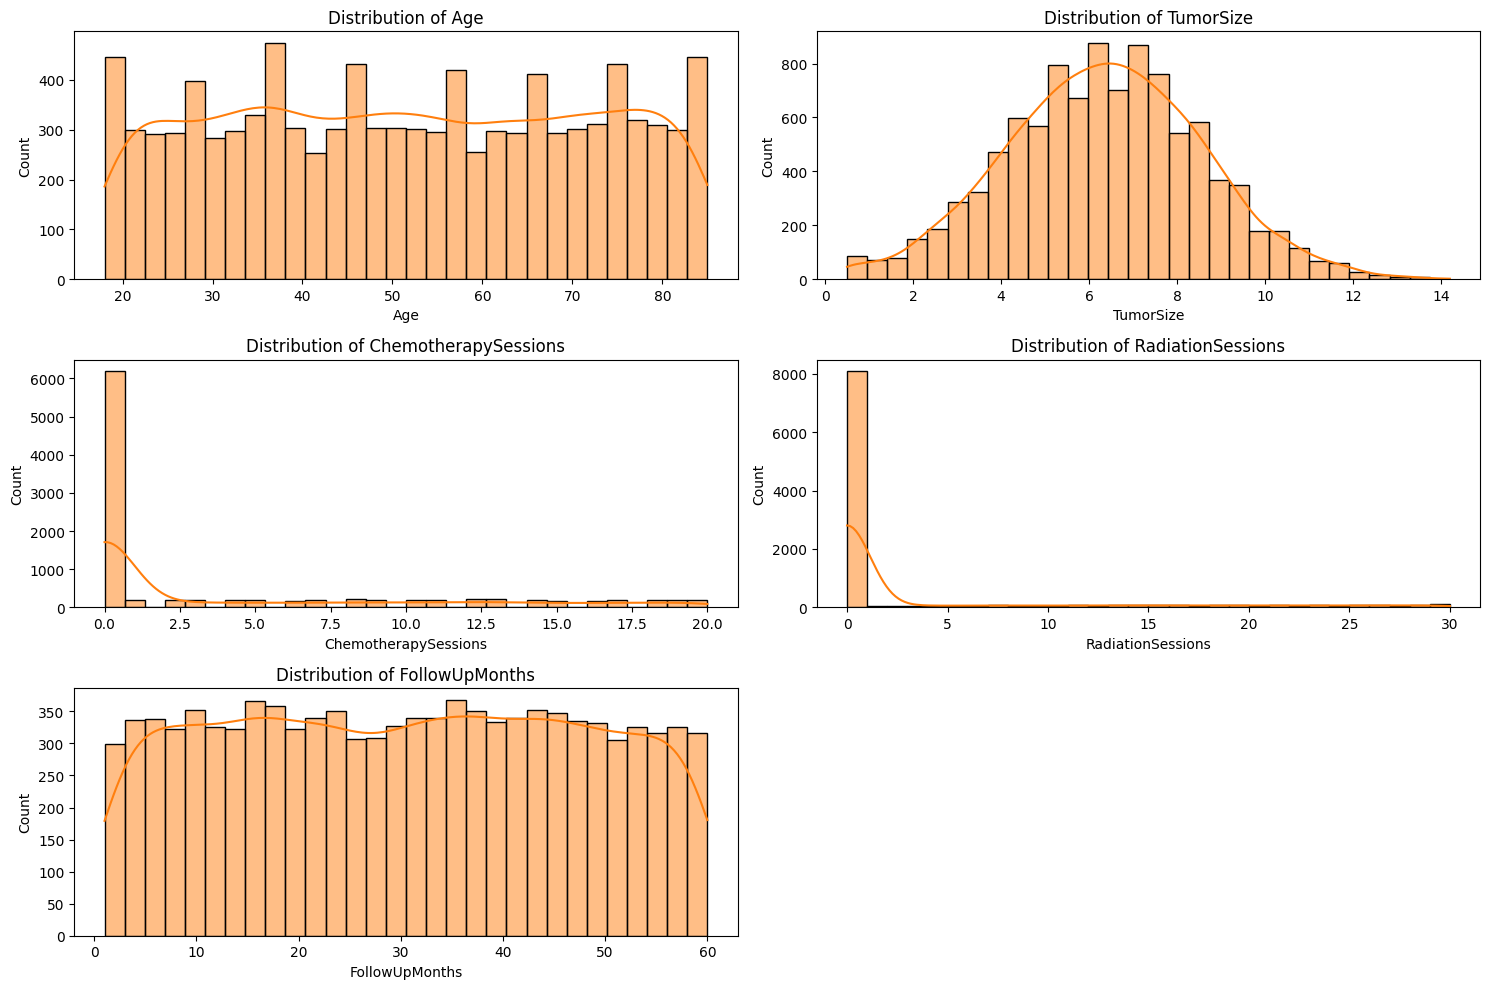

In [12]:
# distribution of numerical columsn

numerical_cols = ['Age', 'TumorSize', 'ChemotherapySessions', 'RadiationSessions', 
                  'FollowUpMonths']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, bins=30,color ='tab:orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

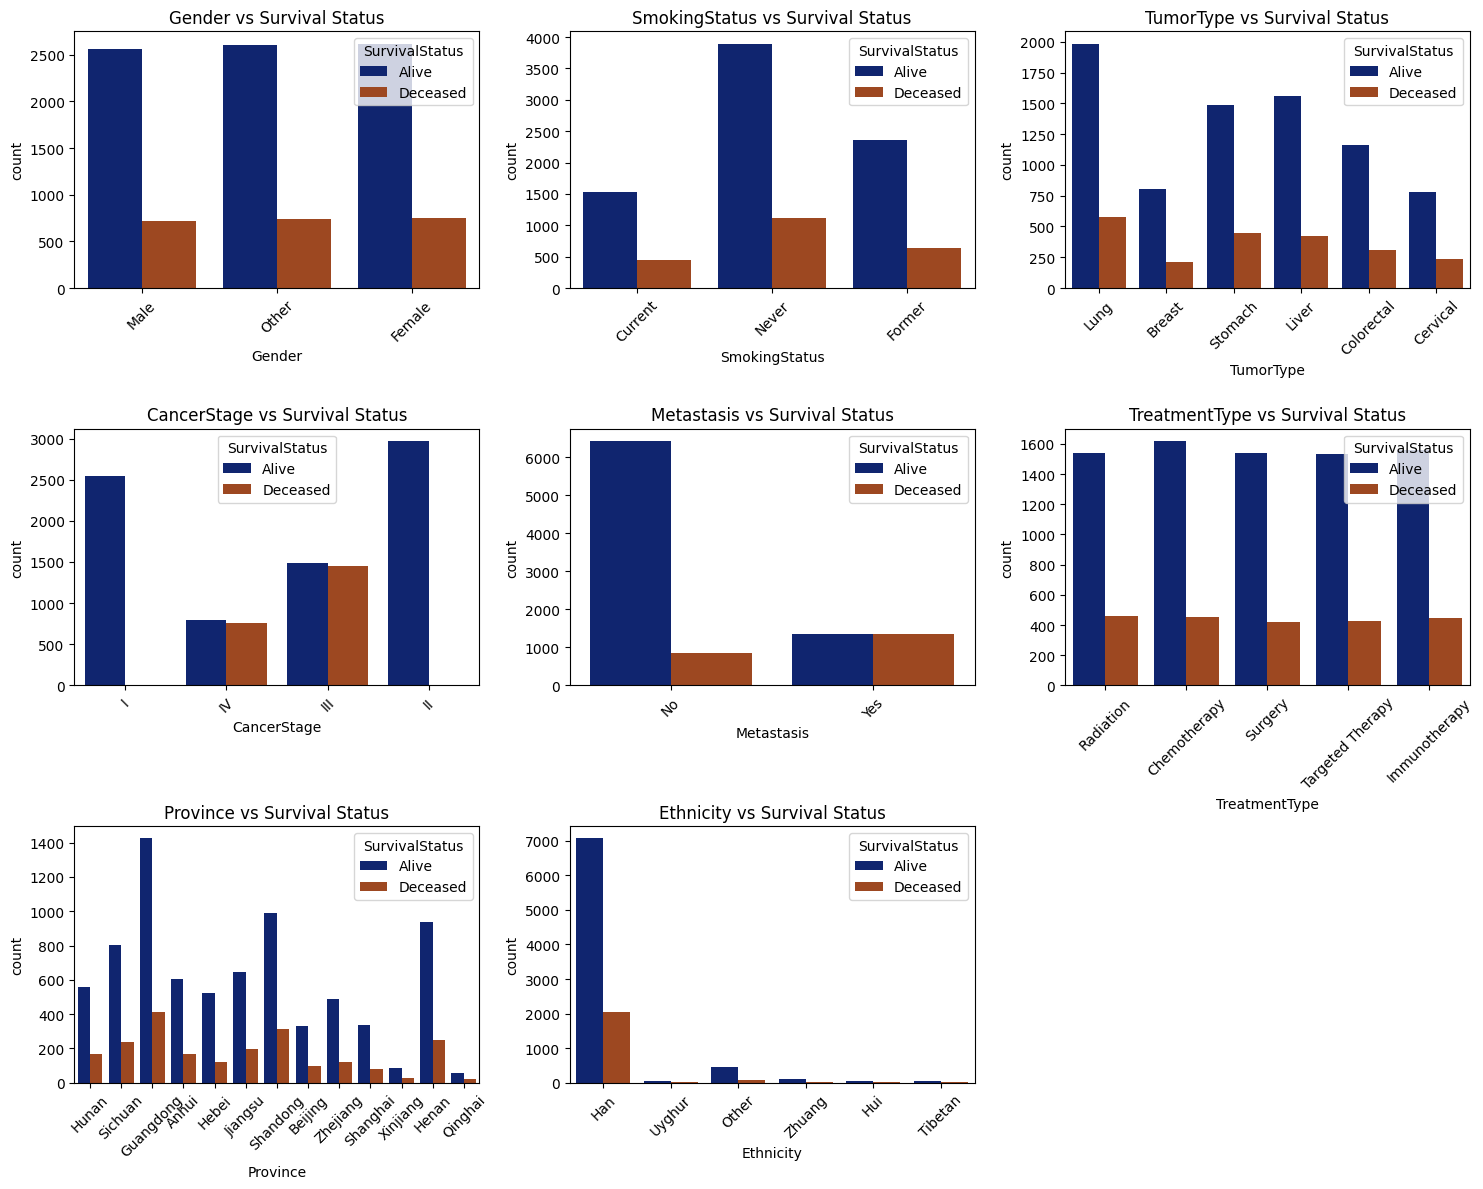

In [13]:
# distribution of categorical columns
categorical_cols = ['Gender', 'SmokingStatus', 'TumorType', 'CancerStage', 'Metastasis', 
                    'TreatmentType','Province','Ethnicity']
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col, hue='SurvivalStatus', palette='dark')
    plt.title(f'{col} vs Survival Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

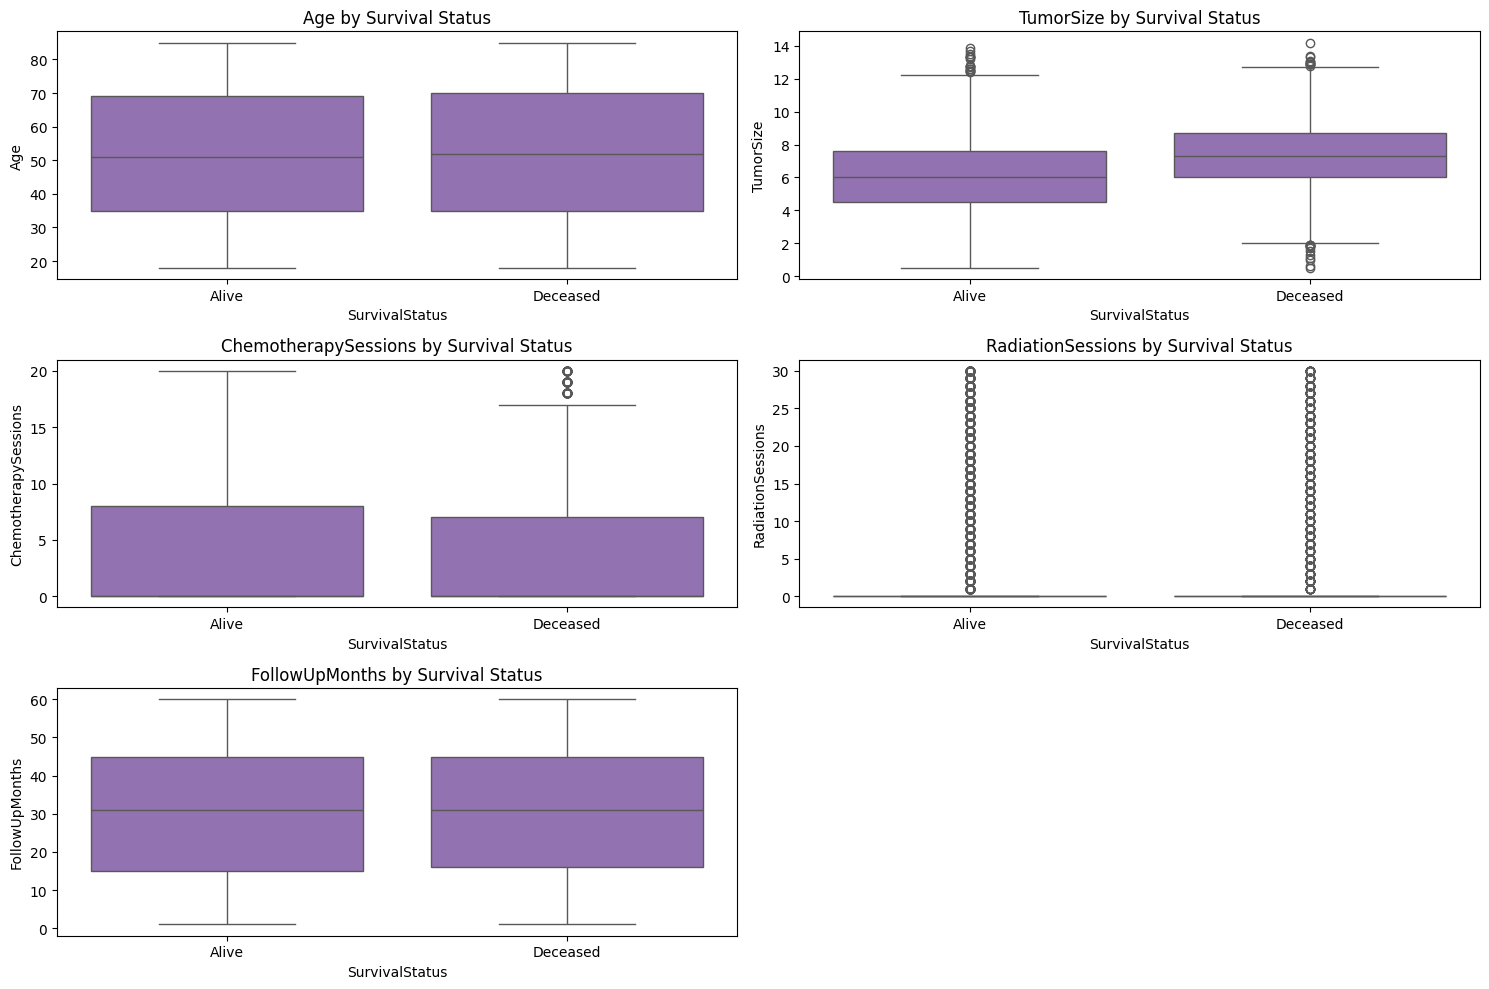

In [14]:
# boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=data, x='SurvivalStatus', y=col, color ='tab:purple')
    plt.title(f'{col} by Survival Status')
plt.tight_layout()
plt.show()

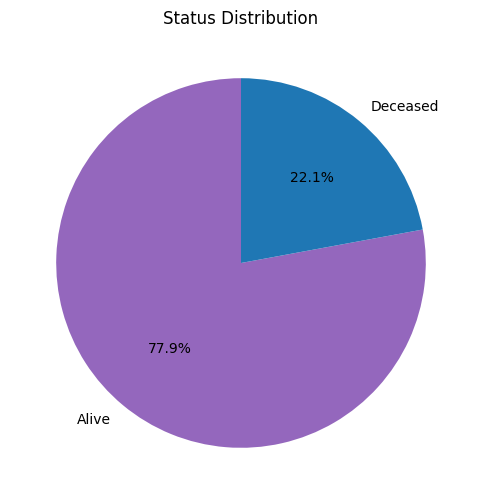

In [15]:
# distribution of target class

num_target = data['SurvivalStatus'].value_counts()
color =['tab:purple', 'tab:blue']

plt.figure(figsize=(6, 6))
plt.pie(num_target, labels=num_target.index, autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Status Distribution")
plt.show()

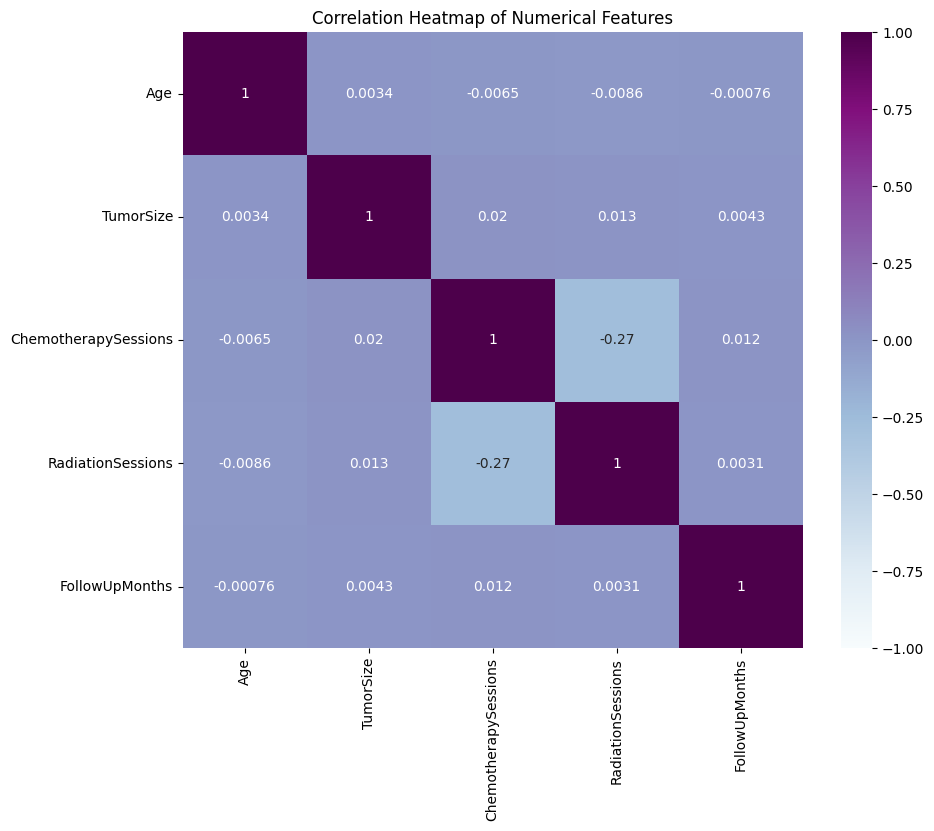

In [16]:
# heatmap

plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The data shows a range of ages (20–80 years) with some peaks at 30, 50, and 70, but age itself doesn’t strongly correlate to the survival rate. Tumor sizes are generally right-skewed, and treatments like chemotherapy and radiation are also skewed, with most patients receiving none. Gender and smoking status don’t seem to significantly impact survival, while cancer stage and metastasis clearly do, early stages have better survival, and metastasis greatly reduces it. 

Different tumor types show similar survival rates, but lung cancer is the most common. In terms of treatment, chemotherapy and surgery are the most frequent, but survival rates are quite consistent across treatment types. Overall, cancer stage and metastasis stand out as the strongest predictors of survival.

From the data above, it can be observed that :
* There are several null values present in some columns
* Class imbalance in survival status (the target)
* The addition of binning on FollowUpMonths might be beneficial 

<h1> Data Preparation</h1>

In the preprocessing section, eliminating duplicates and resolving the null values present from the data will be done. Based on the previous section, there are several null values in 4 columns, AlcoholUse, GeneticMutation, Comorbidities, and SurgeryDate. For the null values in the first 3 columns mentioned, the null values indicates no data on the severity of their actions, meaning the action is not done by the patients. Therefore the null values present in those 3 columns will be changed into indications that they have not done the action. For the last column, SurgeryDate, it will be changed into a different column called HadSurgery, which is to indicate if they have done surgery or not. 

After handling null and duplicates, feature engineering will be done using binning. Based on the data seen before, the Age and FollowUpMonth column can be grouped into groups, where it will be added as an extra feature. The main reason of adding another feature via binning is to add more data for the model to learn and draw conclusions from.

After feature engineering, the data will be scaled and the labels will be encoded to be used in the model. Scaling the data will make the features contribute equally to the result, preventing features with larger scales from having more influence. Label encoding changes the categorical data into numerical, where the model can learn from.

Due to the target labels not being balanced, where the survive status is much higher than the deceased status, then oversampling will be done using SMOTE. For the split test, the data will be splitted 80% for training and 20% for testing.

In [17]:
# na and duplicates
df = data.copy()
print(df.duplicated().sum())

df['AlcoholUse'] =df['AlcoholUse'].fillna('non alcoholic')
df['GeneticMutation'] =df['GeneticMutation'].fillna('No Mutation')
df['Comorbidities'] = df['Comorbidities'].fillna('No Comorbidities')
df['HadSurgery'] = df['SurgeryDate'].notnull().astype(int)
df = df.drop('SurgeryDate', axis=1)

0


In [18]:
# binning
df = df.drop(['PatientID'], axis=1)

edges_followUp =[0,15,45,60]
label_followUp =[1,2,3]

edges_age = [15,30,45,60,75,90]
label_age = [1,2,3,4,5]

bin_followUpMonth = pd.cut(df['FollowUpMonths'], bins=edges_followUp, labels=label_followUp)
df['FollowUpMonths_bin'] = bin_followUpMonth

bin_age = pd.cut(df['Age'], bins = edges_age, labels =label_age)
df['Age_bin'] = bin_age

df['FollowUpMonths_bin'] = df['FollowUpMonths_bin'].astype('int')
df['Age_bin'] = df['Age_bin'].astype('int')

df

,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,...,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities,HadSurgery,FollowUpMonths_bin,Age_bin
0,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,...,23,Alive,44,Current,non alcoholic,No Mutation,No Comorbidities,1,2,2
1,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,...,0,Deceased,57,Never,Occasional,EGFR,"Hepatitis B, Hypertension",1,3,4
2,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,...,0,Alive,40,Former,non alcoholic,No Mutation,No Comorbidities,1,2,1
3,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,...,0,Deceased,45,Never,Occasional,KRAS,No Comorbidities,1,2,2
4,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,...,0,Alive,42,Never,non alcoholic,No Mutation,No Comorbidities,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,21,Shandong,Han,Liver,IV,2018-07-11,8.5,Yes,Targeted Therapy,...,0,Alive,57,Never,Occasional,KRAS,Hypertension,1,3,1
9996,Female,35,Shanghai,Han,Cervical,II,2016-03-31,6.5,No,Targeted Therapy,...,0,Alive,36,Never,non alcoholic,No Mutation,Hepatitis B,1,2,2
9997,Female,58,Shandong,Han,Cervical,III,2019-09-03,8.0,Yes,Immunotherapy,...,0,Alive,35,Former,Occasional,No Mutation,"Hepatitis B, Hypertension",1,2,3
9998,Male,26,Hebei,Han,Lung,I,2014-03-16,6.2,No,Chemotherapy,...,0,Alive,25,Current,Occasional,KRAS,No Comorbidities,0,2,1


In [19]:
# scaling

num_cols = df.select_dtypes(include=['int', 'float']).columns
num_cols = [col for col in num_cols if col not in ['HadSurgery','FollowUpMonths_bin','Age_bin']]
print(num_cols)

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df

['Age', 'TumorSize', 'ChemotherapySessions', 'RadiationSessions', 'FollowUpMonths']


,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,...,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities,HadSurgery,FollowUpMonths_bin,Age_bin
0,Male,-0.994701,Hunan,Han,Lung,I,2010-07-24,0.832686,No,Radiation,...,2.732943,Alive,0.790552,Current,non alcoholic,No Mutation,No Comorbidities,1,2,2
1,Male,0.730783,Sichuan,Han,Lung,IV,2015-01-03,1.414371,Yes,Chemotherapy,...,-0.417250,Deceased,1.548053,Never,Occasional,EGFR,"Hepatitis B, Hypertension",1,3,4
2,Other,-1.299198,Guangdong,Han,Lung,III,2022-03-26,1.324881,Yes,Surgery,...,-0.417250,Alive,0.557474,Former,non alcoholic,No Mutation,No Comorbidities,1,2,1
3,Other,-0.842452,Anhui,Uyghur,Breast,III,2019-06-19,0.608961,No,Surgery,...,-0.417250,Deceased,0.848821,Never,Occasional,KRAS,No Comorbidities,1,2,2
4,Male,-0.994701,Guangdong,Han,Stomach,II,2012-02-07,0.429981,No,Chemotherapy,...,-0.417250,Alive,0.674013,Never,non alcoholic,No Mutation,No Comorbidities,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,-1.552945,Shandong,Han,Liver,IV,2018-07-11,0.966921,Yes,Targeted Therapy,...,-0.417250,Alive,1.548053,Never,Occasional,KRAS,Hypertension,1,3,1
9996,Female,-0.842452,Shanghai,Han,Cervical,II,2016-03-31,0.072022,No,Targeted Therapy,...,-0.417250,Alive,0.324397,Never,non alcoholic,No Mutation,Hepatitis B,1,2,2
9997,Female,0.324787,Shandong,Han,Cervical,III,2019-09-03,0.743196,Yes,Immunotherapy,...,-0.417250,Alive,0.266128,Former,Occasional,No Mutation,"Hepatitis B, Hypertension",1,2,3
9998,Male,-1.299198,Hebei,Han,Lung,I,2014-03-16,-0.062213,No,Chemotherapy,...,-0.417250,Alive,-0.316566,Current,Occasional,KRAS,No Comorbidities,0,2,1


In [20]:
# labeling
object_cols = df.select_dtypes(include=['object']).columns 
print(object_cols)

encoders = {col: LabelEncoder() for col in object_cols if col != 'SurvivalStatus'}

for col in object_cols :
    if col != 'SurvivalStatus':
        df[col] = encoders[col].fit_transform(df[col])

le_target = LabelEncoder()
df['SurvivalStatus'] = le_target.fit_transform(df['SurvivalStatus'])

df

Index(['Gender', 'Province', 'Ethnicity', 'TumorType', 'CancerStage',
       'DiagnosisDate', 'Metastasis', 'TreatmentType', 'SurvivalStatus',
       'SmokingStatus', 'AlcoholUse', 'GeneticMutation', 'Comorbidities'],
      dtype='object')


,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,...,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities,HadSurgery,FollowUpMonths_bin,Age_bin
0,1,-0.994701,5,0,4,0,177,0.832686,0,2,...,2.732943,0,0.790552,0,2,3,9,1,2,2
1,1,0.730783,10,0,4,3,1585,1.414371,1,0,...,-0.417250,1,1.548053,2,1,1,5,1,3,4
2,2,-1.299198,2,0,4,2,3836,1.324881,1,3,...,-0.417250,0,0.557474,1,2,3,9,1,2,1
3,2,-0.842452,0,4,0,2,2972,0.608961,0,3,...,-0.417250,1,0.848821,2,1,2,9,1,2,2
4,1,-0.994701,2,0,5,1,664,0.429981,0,0,...,-0.417250,0,0.674013,2,2,3,9,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,-1.552945,8,0,3,3,2670,0.966921,1,4,...,-0.417250,0,1.548053,2,1,2,6,1,3,1
9996,0,-0.842452,9,0,1,1,1960,0.072022,0,4,...,-0.417250,0,0.324397,2,2,3,3,1,2,2
9997,0,0.324787,8,0,1,2,3043,0.743196,1,1,...,-0.417250,0,0.266128,1,1,3,5,1,2,3
9998,1,-1.299198,3,0,4,0,1340,-0.062213,0,0,...,-0.417250,0,-0.316566,0,1,2,9,0,2,1


In [21]:
# oversampling
x = df.drop(['SurvivalStatus'], axis=1)
y = df['SurvivalStatus']

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

df_processed = pd.DataFrame(x_resampled, columns=x.columns)
df_processed['SurvivalStatus'] = y_resampled

df_processed

,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,...,RadiationSessions,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities,HadSurgery,FollowUpMonths_bin,Age_bin,SurvivalStatus
0,1,-0.994701,5,0,4,0,177,0.832686,0,2,...,2.732943,0.790552,0,2,3,9,1,2,2,0
1,1,0.730783,10,0,4,3,1585,1.414371,1,0,...,-0.417250,1.548053,2,1,1,5,1,3,4,1
2,2,-1.299198,2,0,4,2,3836,1.324881,1,3,...,-0.417250,0.557474,1,2,3,9,1,2,1,0
3,2,-0.842452,0,4,0,2,2972,0.608961,0,3,...,-0.417250,0.848821,2,1,2,9,1,2,2,1
4,1,-0.994701,2,0,5,1,664,0.429981,0,0,...,-0.417250,0.674013,2,2,3,9,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,0,-0.547887,6,0,2,2,1253,-0.051109,0,3,...,-0.417250,-0.105738,1,2,3,7,0,2,2,1
15576,1,0.139947,8,0,3,3,4215,1.453203,1,1,...,-0.417250,-0.170352,1,1,0,4,0,2,3,1
15577,1,-0.158458,7,0,2,2,3501,0.384309,0,0,...,-0.417250,1.420277,1,1,3,5,0,3,2,1
15578,0,0.149204,5,0,2,2,3612,-0.485594,1,1,...,-0.417250,1.168432,2,0,2,5,0,2,3,1


In [22]:
# splitting
x = df_processed.drop(['SurvivalStatus'], axis=1)
y = df_processed['SurvivalStatus']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

12464
3116
12464
3116


<h1>Modeling</h1>


Model going to be used in this project is XGBBoost and RandomForest Classifier. 

XGBoost and Random Forest are both great tools for classification because they’re reliable and accurate. Random Forest works by creating lots of decision trees using different parts of the data, then combines their votes to make a final prediction—this helps avoid overfitting and keeps the model stable. On the other hand, XGBoost builds its trees one after another, with each new tree learning from the mistakes of the previous ones. It uses a smart technique called gradient boosting along with regularization to make sure the model doesn’t overfit while still getting really good at predicting. Both methods use multiple trees to understand complex patterns in the data, but Random Forest focuses on teamwork across trees for stability, while XGBoost focuses on improving step-by-step to get the best results.

In this XGBoost model, n_estimators is how many trees it builds—more trees usually mean better predictions but take longer to train. max_depth controls how complicated each tree can get; deeper trees can catch tricky patterns but might also overfit. The learning_rate decides how much each new tree affects the overall model—a smaller number means the model learns more slowly but often more carefully. eval_metric is just how the model checks its progress during training, and here it’s using something called log loss to see how well it’s doing. Finally, random_state makes sure you get the same results every time you run it, so things are consistent.

In this Random Forest model, n_estimators means it builds 1000 trees to make predictions, which usually helps with accuracy but takes more time to run. min_samples_split sets the minimum number of samples needed to split a node—so here, a node needs at least 3 samples to split further, which helps control how the trees grow. min_samples_leaf means each leaf (the end point of a tree branch) has to have at least 1 sample, preventing leaves that are too small. max_depth limits how deep each tree can go, keeping the model from getting too complex and overfitting. bootstrap=True means each tree is trained on a random sample of the data with replacement, which adds variety and makes the overall model stronger. And random_state=42 is set so you get the same results every time you run it.

In [23]:
def RFModel(x_train, y_train, x_test, y_test):
    RF = RandomForestClassifier(
        n_estimators=1000, 
        min_samples_split=3,  
        min_samples_leaf=1, 
        max_depth=4, 
        bootstrap=True,
        random_state=42
    )
    RF.fit(x_train, y_train)
    y_pred = RF.predict(x_test)

    print("Random Forest Classification Report:")
    print(classification_report(y_test, y_pred))

    cv_scores = cross_val_score(RF, x_train, y_train, cv=5, scoring='f1')
    print('Cross val')
    print(f"Cross-Validation F1 Scores: {cv_scores}")
    print(f"Mean CV F1: {cv_scores.mean()} ± {cv_scores.std()}")

    return y_pred

from sklearn.metrics import make_scorer, f1_score
def XGBModel(x_train, y_train, x_test, y_test):
    
    scorer = make_scorer(f1_score, average='binary')
    
    XGB = XGBClassifier(
        n_estimators=1000,        
        max_depth=6,        
        learning_rate=0.1,          
        eval_metric="logloss",
        random_state=42,
    )
    XGB.fit(x_train, y_train)
    y_pred = XGB.predict(x_test)
    
    print("XGBoost Classification Report:")
    print(classification_report(y_test, y_pred))

    cv_scores = cross_val_score(XGB, x_train, y_train, cv=5, scoring=scorer)
    print('Cross val')
    print(f"Cross-Validation F1 Scores: {cv_scores}")
    print(f"Mean CV F1: {cv_scores.mean()} ± {cv_scores.std()}")

    return y_pred

<h1>Evaluation</h1>

To evaluate the prediction of the model, ClassicationReport will be used to see the Precision, Recall, f1, and Accuracy.

Precision tells us how many of the predicted positive cases were actually correct. In other words, it measures how trustworthy the positive predictions are. Recall shows how many of the actual positive cases the model managed to find, so it reflects how good the model is at not missing positives. The F1-score is a balanced measure that combines both precision and recall, giving us a single number to understand the overall accuracy of positive predictions. Accuracy, meanwhile, is the simplest metric, it just tells us the percentage of all predictions (both positive and negative) that were correct. Each of these metrics helps us see the model’s strengths and weaknesses from different angles.

\begin{align*}
\text{Precision} &= \frac{TP}{TP + FP} \\
\text{Recall} &= \frac{TP}{TP + FN} \\
F1\text{-score} &= 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \\
\text{Accuracy} &= \frac{TP + TN}{TP + TN + FP + FN}
\end{align*}

\textbf{Where:} \\
\( TP \) = True Positives \\
\( TN \) = True Negatives \\
\( FP \) = False Positives \\
\( FN \) = False Negatives 

In [28]:
result_rf = RFModel(x_train, y_train, x_test, y_test)
print( )
result_xgb = XGBModel(x_train, y_train, x_test, y_test)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      1557
           1       0.77      1.00      0.87      1559

    accuracy                           0.85      3116
   macro avg       0.88      0.85      0.85      3116
weighted avg       0.88      0.85      0.85      3116

Cross val
Cross-Validation F1 Scores: [0.87123863 0.87368421 0.87442842 0.86662011 0.87853107]
Mean CV F1: 0.8729004889596682 ± 0.003920642679717605

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1557
           1       0.84      0.88      0.86      1559

    accuracy                           0.86      3116
   macro avg       0.86      0.86      0.86      3116
weighted avg       0.86      0.86      0.86      3116

Cross val
Cross-Validation F1 Scores: [0.86459144 0.87326121 0.87159533 0.86429409 0.87412587]
Mean CV F1: 0.8695735889520382 ± 

Both models performed well, achieving overall accuracy around 85–86%.

Random Forest showed very high precision for class 0 (1.00) but a lower recall (0.70), meaning it was very good at correctly identifying true positives for class 0 without many false positives, but it missed some actual class 0 cases. For class 1, recall was perfect (1.00), catching all true positives, but precision was a bit lower (0.77), indicating some false positives.

XGBoost had a more balanced precision and recall for both classes (around 0.84–0.88), leading to a consistent F1-score of 0.86 for both classes. This suggests XGBoost predicts both classes more evenly.

Both models have similar cross-validation F1 scores (Random Forest mean ~0.873, XGBoost mean ~0.87), confirming their performance is stable across different subsets of the data.